# Universal Kriging for reconstructing via sensor measuring the NLTI

In [9]:
#Cargando librerías 

import importlib
import positioning_sensors as ps
importlib.reload(ps)

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from pykrige import OrdinaryKriging

import pykrige.kriging_tools as kt

plt.style.use("ggplot")

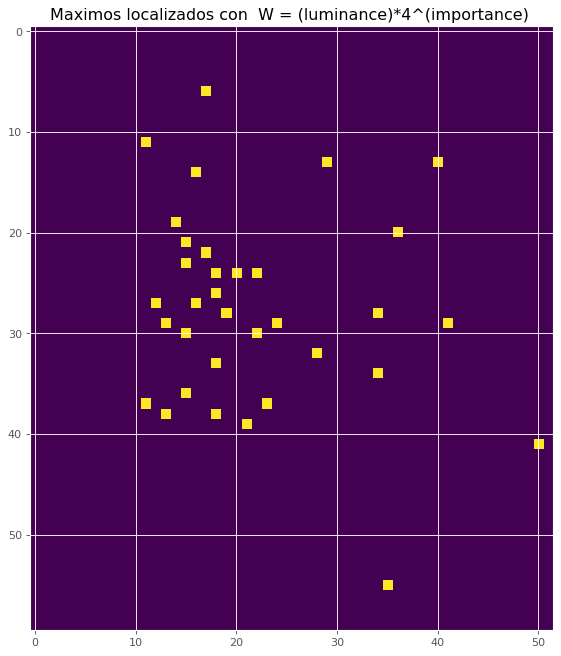

In [10]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)

nonsat = ps.desaturate(luminance,th=62)
nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')

W1 = ps.f5(nonsat,importance)
seeds = ps.getMax(W1)

seeds_nonsat = ps.getMax(nonsat)
coords_nonsat = ps.get_coords(seeds_nonsat)

plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(seeds*np.max(W1)/2+W1)
plt.imshow(seeds)
plt.title("Maximos localizados con  W = (luminance)*4^(importance) ")
plt.show()

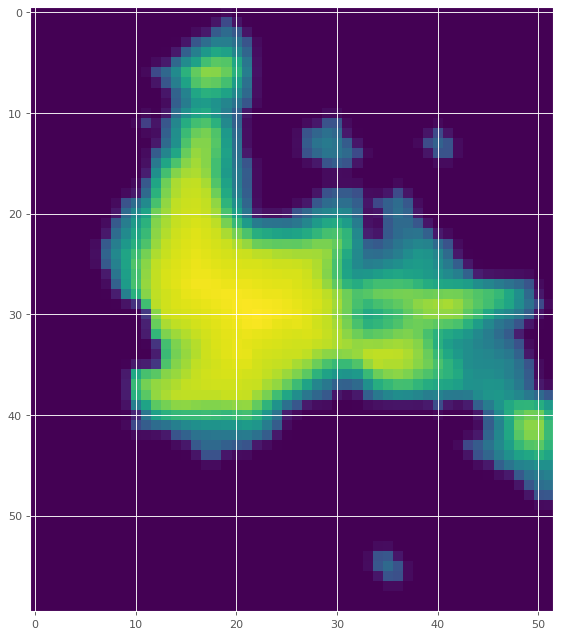

In [11]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(nonsat)

In [278]:
def formatData(coords,img):
    z  = np.zeros(len(coords))
    Y = np.zeros(len(coords))
    X = np.zeros(len(coords))
    for i,c in enumerate(coords):
        z[i] = int(img[c[0]][c[1]])
        Y[i],X[i] = int(c[0]),int(c[1])
    return Y,X,z
        
    
y,x,z = formatData(rp, nonsat)


In [279]:
rp = [[np.random.randint(nonsat.shape[0]-1),np.random.randint(nonsat.shape[1]-1)] for i in range(400)]

y,x,z = formatData(rp, nonsat)



In [212]:
uk = OrdinaryKriging(y, x, z, variogram_model="spherical")

In [213]:
gridy = np.arange(0.0, nonsat.shape[0], 1)
gridx = np.arange(0.0, nonsat.shape[1], 1)

In [214]:
z, ss = uk.execute("grid", gridy , gridx)
ss_std = np.squeeze(ss)

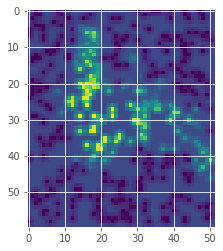

In [215]:
kt.write_asc_grid(gridy, gridx, z, filename="output.asc")
z_r = np.fliplr(np.rot90((np.flip(z))))
#z_r = z

ss_std = np.fliplr(np.rot90((np.flip(ss_std))))
plt.imshow(z_r)
plt.show()

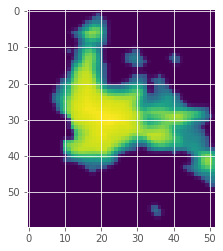

In [216]:
plt.imshow(nonsat)

In [242]:
def aptitude(X,img=nonsat):
    
    

NameError: name 'maks' is not defined

In [248]:
#dif complement
mask = nonsat==0



dif_c  = nonsat*(mask)-z_r*(mask)
dif  = nonsat*(mask==False)-z_r*(mask==False)

penalty = np.sum((dif_c.flatten()*65)**2)
valid_area = np.sum((dif.flatten())**2)

#(penalty+valid_area)/

#plt.imshow( )

np.mean(dif**2)

#print(np.sum(dif_c.flatten()*65)**2)

#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
#plt.show()

247.42515223081074

Text(0.5, 1.0, '956563.4743711571')

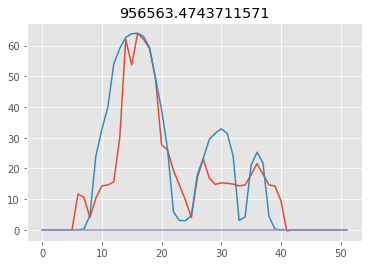

In [217]:
ix= 20
plt.plot(z_r[:][ix]*(nonsat[:][ix]>0))
plt.plot((nonsat[:][ix]))
plt.plot(randomLoc[:][ix]*30)
plt.title(np.sum((nonsat-z_r)**2))


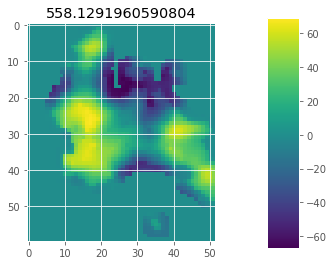

In [182]:
plt.imshow(nonsat-z*(nonsat>0))
plt.title(np.mean((nonsat-z*(nonsat>0))**2))
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()


In [480]:
def formatData(coords,img):

    z  = np.zeros(len(coords))
    Y = np.zeros(len(coords))
    X = np.zeros(len(coords))
    for i,c in enumerate(coords):
        z[i] = int(img[c[0]][c[1]])
        Y[i],X[i] = int(c[0]),int(c[1])
    return Y,X,z

def penalty(coords, forbiden_area,big_number=100000000):


    p = 0
    for i in np.arange(len(coords)):

        if forbiden_area[coords[i][0]][coords[i][1]]:
            p += big_number
            
    return p

def aptitude(X,img=nonsat):
  
    y = np.floor(X[:int(len(X)/2)]).astype(int)
    x = np.floor(X[int(len(X)/2):]).astype(int)
    

    
    gridy = np.arange(0.0, nonsat.shape[0], 1)
    gridx = np.arange(0.0, nonsat.shape[1], 1)
    
    mask = img==0
    
    coords = np.append([y],[x],axis=0).T

    
    x,y,z = formatData(coords,img)
    
    if np.sum((z>0)*1)==len(y) :

        uk = OrdinaryKriging(y, x, z, variogram_model="spherical")
        z, ss = uk.execute("grid", gridy , gridx)
        z_r = np.fliplr(np.rot90((np.flip(z))))

        dif  = img*(mask==False)-z_r*(mask==False)

        valid_area = np.sum((dif.flatten())**2)
        
        
        apt = np.mean(valid_area)+penalty(coords,mask)
    else:
        apt = 100000000000000000000000*np.sum((z>0)*1)
    

    return apt

global mz
mz = np.zeros(nonsat.shape)

def cb(X, convergence):
    global mz
    y = np.floor(X[:int(len(X)/2)]).astype(int)
    x = np.floor(X[int(len(X)/2):]).astype(int)
    
    for i in range(len(y)):
        mz[y[i]][x[i]]=1
        
    plt.imshow(mz)
    plt.show()
    mz=np.zeros(nonsat.shape)

In [478]:
X = [ 3.01874052,50.55268784 ,5.81395655,7.82106563,16.72219107,15.65518275,
 46.01859133,41.25865502,42.17298385,6.92338547,39.71127115,20.31385536,
 48.2792553  , 6.12622477,45.77170836, 35.15354049, 29.06753317, 37.7450801,
 28.32751934, 8.49755387]

print(np.floor(X[:int(len(X)/2)]).astype(int))
print(np.floor(X[int(len(X)/2):]).astype(int))

[ 3 50  5  7 16 15 46 41 42  6]
[39 20 48  6 45 35 29 37 28  8]


In [ ]:
from scipy import optimize

r = optimize.differential_evolution(aptitude,bound,polish=False,disp= True,workers=1,popsize=50)

differential_evolution step 1: f(x)= 7e+08
differential_evolution step 2: f(x)= 6e+08
differential_evolution step 3: f(x)= 6e+08
differential_evolution step 4: f(x)= 5e+08
differential_evolution step 5: f(x)= 5e+08
differential_evolution step 6: f(x)= 5e+08
differential_evolution step 7: f(x)= 4e+08
differential_evolution step 8: f(x)= 4e+08
differential_evolution step 9: f(x)= 4e+08
differential_evolution step 10: f(x)= 4e+08
differential_evolution step 11: f(x)= 4e+08
differential_evolution step 12: f(x)= 4e+08
differential_evolution step 13: f(x)= 4e+08
differential_evolution step 14: f(x)= 4e+08
differential_evolution step 15: f(x)= 4e+08
differential_evolution step 16: f(x)= 4e+08
differential_evolution step 17: f(x)= 4e+08
differential_evolution step 18: f(x)= 4e+08
differential_evolution step 19: f(x)= 4e+08
differential_evolution step 20: f(x)= 4e+08
differential_evolution step 21: f(x)= 4e+08
differential_evolution step 22: f(x)= 4e+08
differential_evolution step 23: f(x)= 4e+

In [456]:
nonsat.shape

(60, 52)

In [457]:


aptitude(X)

1.00000000000001e+23

601499857.7407663

In [ ]:
r 
    

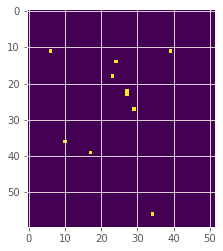

In [121]:
zr = np.zeros(nonsat.shape)
for c in coords:
    zr[c[0]][c[1]] = 1
    
X1 = np.append(X1,r[0])
X2 = np.append(X2,r[1])

Referencias

https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/examples/07_regression_kriging2d.html
https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/variogram_models.html?highlight=variogram#variogram-models
https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/examples/07_regression_kriging2d.html
https://link.springer.com/chapter/10.1007%2F978-94-011-5014-9_23